In [45]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
import dtw
import improved_dtw
import os
import pickle

from data_processing import DataIterator
from models import Autoregression

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from testing import TestFactory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
tests = TestFactory(random_state=42)
X = tests.set_sample(10)

Elapsed time: 30.45


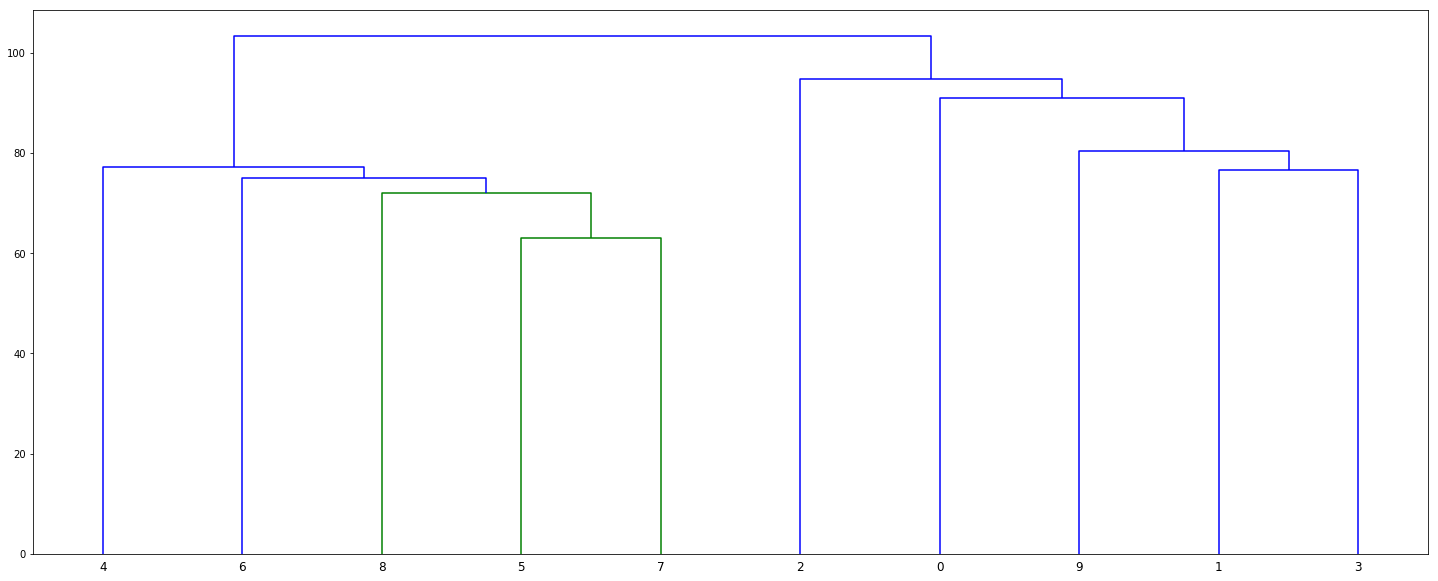

In [23]:
Z = tests.test_dtw(dtw.dtw, p_dist(2), visualize=True)

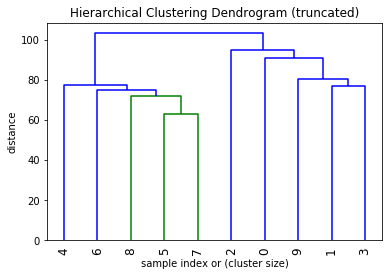

In [24]:
plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index or (cluster size)')
plt.ylabel('distance')
dendrogram(
    Z,
    truncate_mode='lastp',  # show only the last p merged clusters
    p=12,  # show only the last p merged clusters
    leaf_rotation=90.,
    leaf_font_size=12.,
    show_contracted=True,  # to get a distribution impression in truncated branches
)
plt.show()

In [25]:
cluster_num = 4
clusters_labels = fcluster(Z, 4, criterion='maxclust')

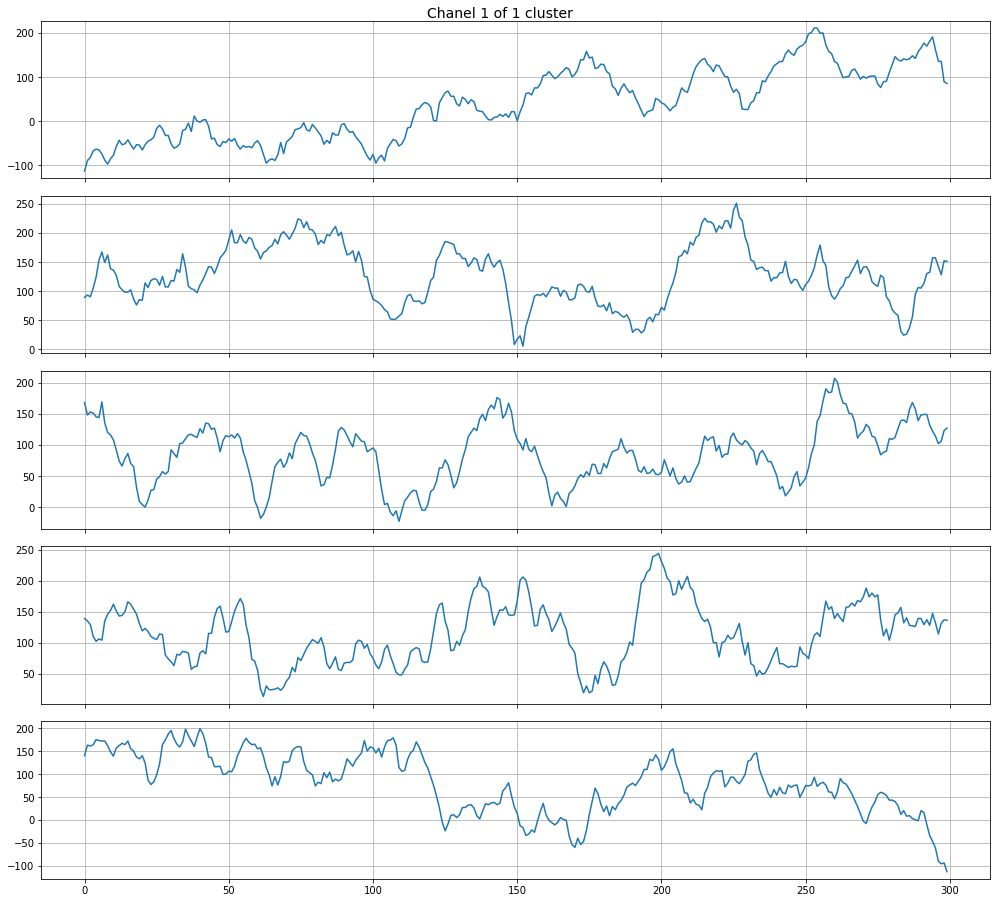

In [39]:
tests.show_clustered(Z, clusters_labels, label=1)

## Рассмотрим ранее кластеризованный наборы

In [54]:
tests = TestFactory(random_state=42)
X = tests.set_sample(50)
result_linkages_files = os.listdir("../data/results/2/")

In [55]:
linkages = []
for file in result_linkages_files:
    with open("../data/results/2/{0}".format(file), 'rb') as f:
        linkages.append(pickle.load(f))

In [56]:
link = linkages[0]

In [75]:
cluster_num = 5
clusters_labels = fcluster(link, 10, criterion='maxclust')

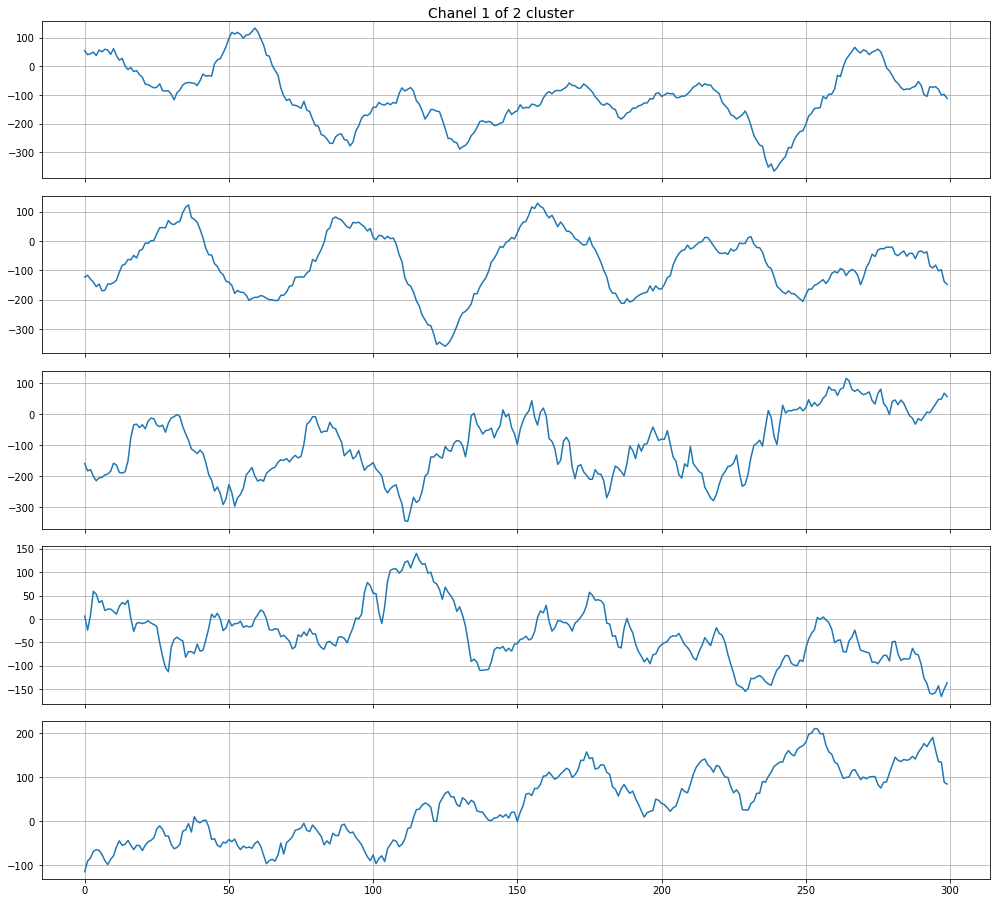

In [87]:
%matplotlib inline
tests.show_clustered(link, clusters_labels, label=2, max_num=5)